# CS 533 Project: TVCA - Bike lane infrastructure and bike traffic
by Abishai Joy and Ravishankar

## Purpose and Context
The purpose of this notebook is to determine if bike lane infrastructure predicts bike traffic

## Setup

In [404]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from simpledbf import Dbf5 

import glob

import datetime
import calendar

## Load Data

In [405]:
path = 'clean-data/*.csv'
for fname in glob.glob(path):
    print(fname)

clean-data/bike-count-2019-may.csv
clean-data/bike-count-2018-may.csv
clean-data/bike-count-2014-sept.csv
clean-data/bike-count-2013-may.csv
clean-data/bike-count-2012-sept.csv
clean-data/bike-count-2013-sept.csv
clean-data/bike-count-2012-may.csv
clean-data/bike-count-overall.csv
clean-data/bike-count-2011.csv
clean-data/bike-count-2010-2019-may.csv
clean-data/bike-count-2010.csv
clean-data/bike-count-2016-may.csv
clean-data/bike-count-2014-may.csv
clean-data/bike-count-2015-may.csv
clean-data/bike-count-2010-2019.csv


In [406]:
# Overall data
bike_count_overall = pd.read_csv('clean-data/bike-count-overall.csv')
bike_count_overall.head()

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average,Year Counts
0,03rd / Bannock,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,52,52.0,1
1,03rd / Myrtle,0.0,151.0,0.0,0.0,59.0,150.0,95.0,133.0,0.0,0.0,588,117.6,5
2,05th / Idaho,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,28,28.0,1
3,06th / O'Farrell,0.0,0.0,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,62,62.0,1
4,06th / Union,0.0,0.0,0.0,137.0,0.0,0.0,0.0,0.0,0.0,0.0,137,137.0,1


In [407]:
# GIS player that contains bike lane information
bike_dbf = Dbf5('orig-data/bike.dbf')
bike_df = bike_dbf.to_dataframe()
bike_df.head()

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
0,6986.963846,ACHD,1995,ARTERIAL,Bike Lane,2016-08-09,E,Warm Springs,Ave,1.323289,30,Boise,Avenue C-Old Penitentiary,2.646577,2,NaN,NaN,6986.963846
1,457.445459,ACHD,2003,LOCAL,Bike Lane,2016-08-12,S,Riverstone,Ln,0.086637,15,Boise,River Run-Riverpark,0.173275,2,NaN,NaN,457.445459
2,4774.728140,ACHD,1995,COLLECTOR,Bike Lane,2016-08-12,E,River Run,Dr,0.904305,20,Boise,Parkcenter-Parkcenter,1.808609,2,NaN,NaN,4774.728140
3,5316.741855,ACHD,1996,COLLECTOR,Bike Lane,2016-08-17,W,Desert,Ave,1.006959,30,Ada,Maple Grove-Cole,2.013917,2,NaN,NaN,5316.741855
4,2190.112489,ACHD,2000,ARTERIAL,Bike Lane,2016-06-27,W,Hill,Pkwy,0.414794,35,Boise,Horseshoe Bend-Gary,0.829588,2,NaN,NaN,2190.112489


## Analysis

We're interested in the top 10 streets with counts between 2010 and 2019

In [408]:
top10_overall = bike_count_overall[bike_count_overall['Year Counts'] >= 6]
top10_overall

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September,2015-May,2019-May,Total,Average,Year Counts
6,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0,0.0,0.0,1562,195.250000,8
11,08th / Greenbelt,270.0,346.0,0.0,315.0,200.0,250.0,178.0,281.0,0.0,0.0,1840,262.857143,7
13,08th / River,252.0,249.0,115.0,146.0,123.0,295.0,177.0,302.0,0.0,0.0,1659,207.375000,8
18,13th / Fort,105.0,0.0,0.0,129.0,80.0,126.0,64.0,102.0,0.0,0.0,792,99.000000,6
57,Broadway / Warm Springs,0.0,58.0,0.0,64.0,47.0,73.0,65.0,62.0,0.0,0.0,567,70.875000,6
59,Chinden / Garrett,0.0,61.0,78.0,25.0,47.0,36.0,76.0,0.0,0.0,0.0,323,53.833333,6
62,Collister / Catalpa,43.0,59.0,56.0,0.0,0.0,43.0,51.0,49.0,0.0,0.0,351,43.875000,6
67,Emerald / Americana / Latah,130.0,0.0,155.0,0.0,116.0,129.0,134.0,182.0,0.0,0.0,846,141.000000,6
76,Five Mile / McMillan,52.0,76.0,55.0,0.0,0.0,66.0,49.0,57.0,0.0,0.0,437,54.625000,6
86,Hill / Castle,0.0,0.0,53.0,0.0,33.0,38.0,20.0,27.0,34.0,0.0,205,34.166667,6


In [409]:
# Drop 2015 and 2019 due to no data
# Drop Total Average & Year Counts because they are not meaningful
top10_overall = top10_overall.drop(columns=['2015-May','2019-May','Total','Average','Year Counts'])
top10_overall

,Location,2010,2011,2012-May,2012-September,2013-May,2013-September,2014-May,2014-September
6,08th / Bannock,267.0,115.0,148.0,178.0,149.0,165.0,234.0,306.0
11,08th / Greenbelt,270.0,346.0,0.0,315.0,200.0,250.0,178.0,281.0
13,08th / River,252.0,249.0,115.0,146.0,123.0,295.0,177.0,302.0
18,13th / Fort,105.0,0.0,0.0,129.0,80.0,126.0,64.0,102.0
57,Broadway / Warm Springs,0.0,58.0,0.0,64.0,47.0,73.0,65.0,62.0
59,Chinden / Garrett,0.0,61.0,78.0,25.0,47.0,36.0,76.0,0.0
62,Collister / Catalpa,43.0,59.0,56.0,0.0,0.0,43.0,51.0,49.0
67,Emerald / Americana / Latah,130.0,0.0,155.0,0.0,116.0,129.0,134.0,182.0
76,Five Mile / McMillan,52.0,76.0,55.0,0.0,0.0,66.0,49.0,57.0
86,Hill / Castle,0.0,0.0,53.0,0.0,33.0,38.0,20.0,27.0


Text(0.5, 1.0, 'Bicycle counts over the years for intersections with the most data')

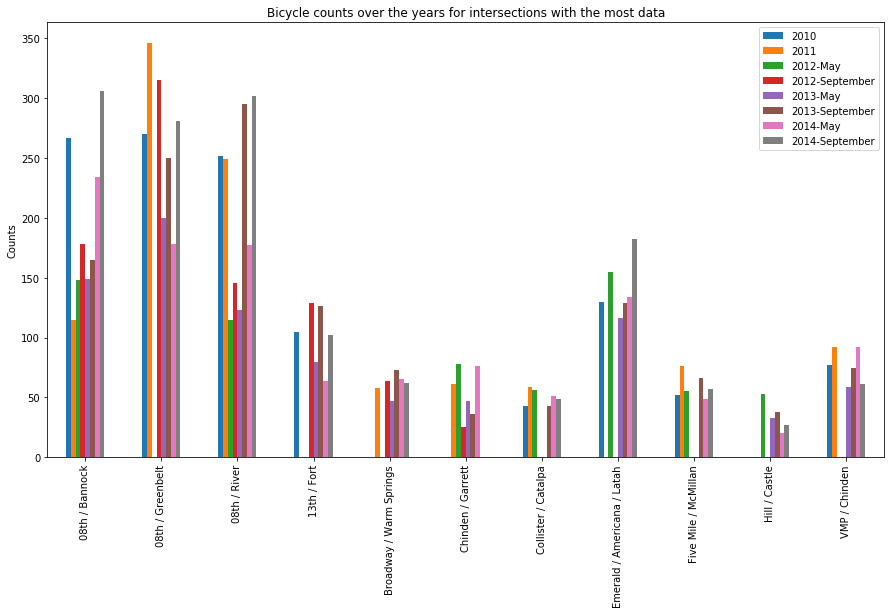

In [410]:
g = top10_overall.plot.bar(figsize=(15,8))
g.set_xticklabels(top10_overall['Location'])
g.set_ylabel('Counts')
g.set_title('Bicycle counts over the years for intersections with the most data')
# fig = g.get_figure()
# fig.savefig("output.png")

### Extract as a dataframe the top 10 intersection for which we have data from the bike GIS layer

In [411]:
bannock = bike_df[bike_df['StName']=="Bannock"]
bannock

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
54,2660.012209,ACHD,2003,COLLECTOR,Bike Lane,2016-08-09,W,Bannock,St,0.503790,20,Boise,13th-6th,1.007580,2,NaN,NaN,2660.012209
64,2194.109365,ACHD,2003,LOCAL,Neighborhood Bike Route,2016-08-09,W,Bannock,St,0.415551,20,Boise,NaN,0.831102,2,NaN,NaN,2194.109365
186,1520.353249,ACHD,2012,COLLECTOR,Shared Bike Route,2016-08-09,W,Bannock,St,0.287946,20,Boise,NaN,0.575891,2,NaN,NaN,1520.353249
209,760.104325,ACHD,2012,COLLECTOR,Bike Lane,2016-08-09,W,Bannock,St,0.143959,20,Boise,15th-13th,0.287918,2,NaN,NaN,760.104325
726,1140.400903,ACHD,2003,LOCAL,Shared Bike Route,2016-08-09,W,Bannock,St,0.215985,20,Boise,NaN,0.431970,2,NaN,NaN,1140.400903
940,378.425604,ACHD,2012,COLLECTOR,Shared Bike Route,2016-08-09,W,Bannock,St,0.071672,20,Boise,NaN,0.143343,2,NaN,NaN,378.425604
941,889.757593,ACHD,2003,LOCAL,Neighborhood Bike Route,2016-08-09,W,Bannock,St,0.168515,20,Boise,NaN,0.337029,2,NaN,NaN,889.757593
953,379.625763,ACHD,2012,LOCAL,Shared Bike Route,2016-08-09,W,Bannock,St,0.071899,20,Boise,NaN,0.143798,2,NaN,NaN,379.625763


In [412]:
eigthth = bike_df[bike_df['StName']=="8th"]
eigthth

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
88,1341.639540,ACHD,2003,COLLECTOR,Bike Lane,2016-08-05,NW,8th,St,0.254098,25,Meridian,NaN,0.508197,2,NaN,NaN,1341.639540
123,1331.885936,ACHD,2003,COLLECTOR,Bike Lane,2016-08-05,NW,8th,St,0.252251,25,Meridian,Pine-Camelia,0.504502,2,NaN,NaN,1331.885936
187,1360.656384,ACHD,2012,LOCAL,Shared Bike Route,2016-08-17,S,8th,St,0.257700,20,Boise,NaN,0.515400,2,NaN,NaN,1360.656384
247,1958.543500,ACHD,2013,COLLECTOR,Neighborhood Bike Route,2016-08-04,NW,8th,St,0.370936,0,Meridian,NaN,0.741873,2,NaN,NaN,1958.543500
285,680.360534,ACHD,2015,COLLECTOR,Shared Bike Route,2016-08-17,S,8th,St,0.128856,20,Boise,NaN,0.257712,2,NaN,NaN,680.360534
950,339.891356,ACHD,2012,LOCAL,Shared Bike Route,2016-08-17,S,8th,St,0.064373,20,Boise,NaN,0.128747,2,NaN,NaN,339.891357


In [413]:
river = bike_df[bike_df['StName']=="River"]
river

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
216,2173.54404,ACHD,2012,COLLECTOR,Bike Lane,2016-08-09,W,River,St,0.411656,30,Boise,Pioneer-Capitol,0.823312,2,NaN,NaN,2173.54404


In [414]:
fort = bike_df[bike_df['StName']=="Fort"]
fort

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
228,6140.207828,ACHD,2013,COLLECTOR,Shared Bike Route,2016-08-17,W,Fort,St,1.162918,30,Boise,NaN,2.325836,2,NaN,NaN,6140.207828
732,862.593575,ACHD,2015,ARTERIAL,Difficult Bike Route,2016-08-09,E,Fort,St,0.163370,30,Boise,NaN,0.326740,2,NaN,NaN,862.593575


In [415]:
thirteenth = bike_df[bike_df['StName']=="13th"]
thirteenth

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
206,4325.936348,ACHD,2012,COLLECTOR,Shared Bike Route,2016-07-19,N,13th,St,0.819306,20,Boise,NaN,1.638612,2,NaN,NaN,4325.936348
644,137.534428,ACHD,2015,LOCAL,Neighborhood Bike Route,2016-08-05,NW,13th,Ave,0.026048,25,Meridian,NaN,0.052096,2,NaN,NaN,137.534428


In [416]:
broadway = bike_df[bike_df['StName']=="Broadway"]
broadway

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
809,649.739972,ITD,2015,ARTERIAL,Bike Lane,2016-08-15,S,Broadway,Ave,0.123057,35,Boise,I84IC,0.246114,2,NaN,NaN,649.739972
965,582.552656,ITD,2015,COLLECTOR,Bike Lane,2016-08-15,S,Broadway,Ave,0.110332,35,Boise,Commerce-north 583',0.220664,2,NaN,NaN,582.552656
1086,609.724255,ITD,2015,ARTERIAL,Bike Lane,2016-08-15,S,Broadway,Ave,0.115478,45,Boise,I84IC,0.230956,2,NaN,NaN,609.724255
1119,2550.845386,ITD,2017,ARTERIAL,Bike Lane,2017-03-24,S,Broadway,Ave,0.483115,35,Boise,University Dr to Front St,0.966229,2,None,NaN,2550.845386
1120,931.026654,ACHD,2017,ARTERIAL,Difficult Bike Route,2017-03-24,S,Broadway,Ave,0.176331,35,Boise,Beacon St to University Dr,0.352662,2,None,NaN,931.026654
1121,1185.986544,ACHD,2017,ARTERIAL,Difficult Bike Route,2017-03-24,S,Broadway,Ave,0.224619,35,Boise,Front St to Warm Springs Ave,0.449237,2,None,NaN,1185.986544


In [417]:
warmsprings = bike_df[bike_df['StName']=="Warm Springs"]
warmsprings

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
0,6986.963846,ACHD,1995,ARTERIAL,Bike Lane,2016-08-09,E,Warm Springs,Ave,1.323289,30,Boise,Avenue C-Old Penitentiary,2.646577,2,NaN,NaN,6986.963846
1131,1126.272465,ACHD,2017,LOCAL,Bike Lane,2017-03-27,E,Warm Springs,Ave,0.213309,35,Boise,Parkcenter Blvd to Barber Dr,0.426618,2,None,NaN,1126.272465
1139,5557.605091,ACHD,2017,LOCAL,Bike Lane,2017-03-27,E,Warm Springs,Ave,1.052577,20,Boise,E Parkcenter Blvd to 240' WO S Pheasant Tail Way,2.105153,2,None,NaN,5557.605091
1140,475.868099,ACHD,2017,LOCAL,Bike Lane,2017-03-27,E,Warm Springs,Ave,0.090127,20,Boise,E Parkcenter Blvd to 240' WO S Pheasant Tail Way,0.090127,1,None,NaN,475.868099
1141,485.048774,ACHD,2017,LOCAL,Bike Lane,2017-03-27,E,Warm Springs,Ave,0.091865,20,Boise,E Parkcenter Blvd to 240' WO S Pheasant Tail Way,0.091865,1,None,NaN,485.048774
1147,200.956076,ACHD,2017,LOCAL,Bike Lane,2017-03-27,E,Warm Springs,Ave,0.038060,35,Boise,Parkcenter Blvd to Barber Dr,0.038060,1,None,NaN,200.956076
1148,220.783283,ACHD,2017,LOCAL,Bike Lane,2017-03-27,E,Warm Springs,Ave,0.041815,35,Boise,Parkcenter Blvd to Barber Dr,0.041815,1,None,NaN,220.783283


In [418]:
chinden = bike_df[bike_df['StName']=="Chinden"]
chinden

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
76,5288.421825,ACHD,2007,ARTERIAL,Bike Lane,2016-08-01,E,Chinden,Blvd,1.001595,45,Boise,Eagle-Joplin,2.003190,2,NaN,NaN,5288.421825
121,4575.676327,ITD,2007,ARTERIAL,Bike Lane,2016-08-02,W,Chinden,Blvd,0.866605,45,Boise,Cloverdale-Five Mile,1.733211,2,NaN,NaN,4575.676327
418,2779.043450,ITD,2007,ARTERIAL,Bike Lane,2016-08-02,W,Chinden,Blvd,0.526334,45,Boise,Five Mile-740' w/o Joplin,1.052668,2,NaN,NaN,2779.043450
427,7063.493248,ACHD,2015,ARTERIAL,Difficult Bike Route,2016-08-02,W,Chinden,Blvd,1.337783,35,Garden City,NaN,2.675566,2,NaN,NaN,7063.493248
1010,1073.779499,ACHD,2015,ARTERIAL,Difficult Bike Route,2016-08-02,NaN,Chinden,Blvd,0.203367,45,Ada,NaN,0.406735,2,NaN,NaN,1073.779499


In [419]:
garrett = bike_df[bike_df['StName']=="Garrett"]
garrett

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
156,1102.472869,ACHD,2003,COLLECTOR,Neighborhood Bike Route,2016-08-02,N,Garrett,St,0.208802,25,Garden City,NaN,0.417603,2,NaN,NaN,1102.472869


In [420]:
collister = bike_df[bike_df['StName']=="Collister"]
collister

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
331,6029.722832,ACHD,2015,COLLECTOR,Shared Bike Route,2016-06-28,N,Collister,Dr,1.141993,30,Boise,NaN,2.283986,2,NaN,NaN,6029.722832


In [421]:
catalpa = bike_df[bike_df['StName']=="Catalpa"]
catalpa

,LENGTH,AGENCY,YEAR,FCLASS,PATHTYPE,Date,StPreDir,StName,StSuffix,LengthMile,SpeedLimit,City,Segment,BikeLnMile,NoOfLanes,MarksOrSig,Plans,Shape_STLe
332,3704.293810,ACHD,2015,COLLECTOR,Bike Lane,2016-09-14,W,Catalpa,Dr,0.701571,30,Boise,Collister-Hill,1.403142,2,NaN,NaN,3704.293810
1077,154.363099,ACHD,2015,LOCAL,Bike Lane,2016-09-14,W,Catalpa,Dr,0.029235,30,Boise,Catalpa-Hill,0.029235,1,NaN,NaN,154.363099
1078,168.708103,ACHD,2015,LOCAL,Bike Lane,2016-09-14,W,Catalpa,Dr,0.031952,30,Boise,Catalpa-Hill,0.031952,1,NaN,NaN,168.708103


In [432]:
top10_overall['Location']

6                   08th / Bannock
11                08th / Greenbelt
13                    08th / River
18                     13th / Fort
57         Broadway / Warm Springs
59               Chinden / Garrett
62             Collister / Catalpa
67     Emerald / Americana / Latah
76            Five Mile / McMillan
86                   Hill / Castle
130                  VMP / Chinden
Name: Location, dtype: object

Load the concatenated csv

In [433]:
bike_count_2010_2019_may = pd.read_csv('clean-data/bike-count-2010-2019-may.csv')
bike_count_2010_2019_may.head()

,Location,Date,Time,Total
0,08th / Bannock,2012-05-16,AM,148.0
1,08th / Franklin,2012-05-17,AM,61.0
2,08th / River,2012-05-16,AM,115.0
3,10th /Bannock,2012-05-16,PM,185.0
4,10th / Franklin,2012-05-15,AM,113.0


Filter out the streets that we're looking for

In [434]:
top_10_may = bike_count_2010_2019_may[bike_count_2010_2019_may['Location'].isin(['08th / Bannock', 
                                                                           '08th / Greenbelt', 
                                                                           '08th / River', 
                                                                           '13th / Fort',
                                                                           'Broadway / Warm Springs',
                                                                           'Chinden / Garrett',
                                                                           'Collister / Catalpa',
                                                                           'Emerald / Americana / Latah',
                                                                           'Five Mile / McMillan',
                                                                           'Hill / Castle',
                                                                           'VMP / Chinden']) ]
top_10_may.head()

,Location,Date,Time,Total
0,08th / Bannock,2012-05-16,AM,148.0
2,08th / River,2012-05-16,AM,115.0
17,Chinden / Garrett,2012-05-15,PM,78.0
18,Collister / Catalpa,2012-05-15,PM,56.0
19,Emerald / Americana / Latah,2012-05-16,PM,155.0


Convert Date to datetime64 type so we cn extract month and year from it

In [435]:
top_10_may['Date'] = pd.to_datetime(top_10_may['Date'])
print (top_10_may['Date'].dtype)

datetime64[ns]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [436]:
top_10_may['Year'] = top_10_may['Date'].dt.year

# To convert month into to month name
# top_10_may['Month'] = top_10_may['Month'].apply(lambda x: calendar.month_abbr[x])
# top_10_may.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [437]:
# Dropping Date column now that we have the year and know the month(May)
top_10_may.drop(columns=['Date'], inplace=True)
top_10_may

,Location,Time,Total,Year
0,08th / Bannock,AM,148.0,2012
2,08th / River,AM,115.0,2012
17,Chinden / Garrett,PM,78.0,2012
18,Collister / Catalpa,PM,56.0,2012
19,Emerald / Americana / Latah,PM,155.0,2012
21,Five Mile / McMillan,AM,55.0,2012
23,Hill / Castle,PM,53.0,2012
31,08th / Bannock,AM,149.0,2013
34,08th / River,AM,123.0,2013
36,13th / Fort,AM,80.0,2013


In [438]:
# Convert long to wide data frame
top_10_may = top_10_may.set_index(['Location','Year','Time']).unstack()
top_10_may

Total       
Time                                 AM     PM
Location                    Year              
08th / Bannock              2012  148.0    NaN
                            2013  149.0    NaN
08th / River                2012  115.0    NaN
                            2013  123.0    NaN
13th / Fort                 2013   80.0    NaN
Broadway / Warm Springs     2013   47.0    NaN
Chinden / Garrett           2012    NaN   78.0
                            2013    NaN   47.0
Collister / Catalpa         2012    NaN   56.0
Emerald / Americana / Latah 2012    NaN  155.0
                            2013    NaN  116.0
Five Mile / McMillan        2012   55.0    NaN
Hill / Castle               2012    NaN   53.0
                            2013    NaN   33.0
                            2015    NaN   34.0
VMP / Chinden               2013   45.0   59.0

In [440]:
# Imputing null values
top_10_may = top_10_may.fillna(0)
top_10_may

Total       
Time                                 AM     PM
Location                    Year              
08th / Bannock              2012  148.0    0.0
                            2013  149.0    0.0
08th / River                2012  115.0    0.0
                            2013  123.0    0.0
13th / Fort                 2013   80.0    0.0
Broadway / Warm Springs     2013   47.0    0.0
Chinden / Garrett           2012    0.0   78.0
                            2013    0.0   47.0
Collister / Catalpa         2012    0.0   56.0
Emerald / Americana / Latah 2012    0.0  155.0
                            2013    0.0  116.0
Five Mile / McMillan        2012   55.0    0.0
Hill / Castle               2012    0.0   53.0
                            2013    0.0   33.0
                            2015    0.0   34.0
VMP / Chinden               2013   45.0   59.0

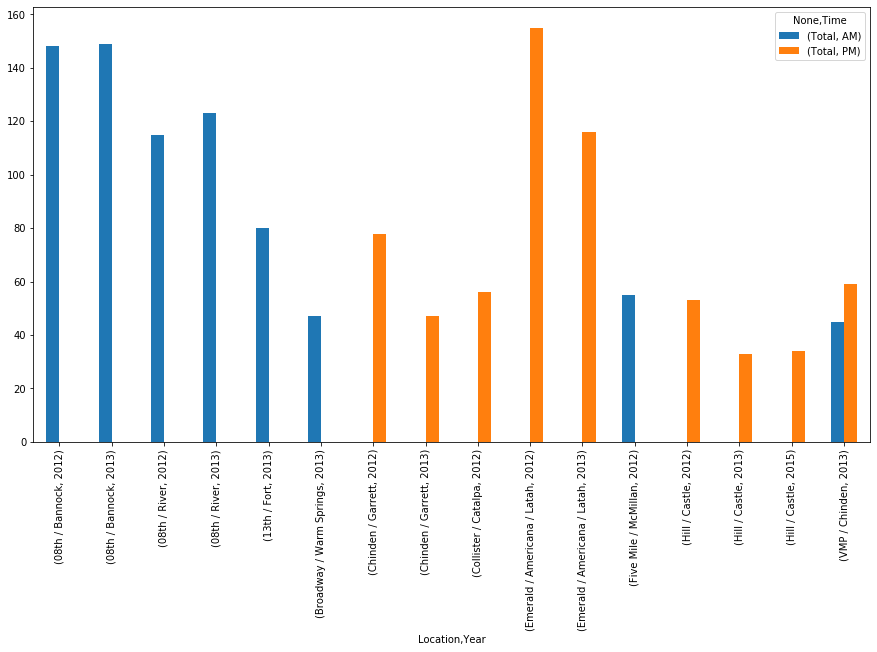

In [441]:
# Plot the counts
top_10_may.plot.bar(figsize=(15,8))